### Analysis of an E-commerce Dataset

We have been provided with a combined e-commerce dataset. In this dataset, each user has the ability to post a rating and review for the products they purchased. Additionally, other users can evaluate the initial rating and review by expressing their trust or distrust.

This dataset includes a wealth of information for each user. Details such as their profile, ID, gender, city of birth, product ratings (on a scale of 1-5), reviews, and the prices of the products they purchased are all included. Moreover, for each product rating, we have information about the product name, ID, price, and category, the rating score, the timestamp of the rating and review, and the average helpfulness of the rating given by others (on a scale of 1-5).

The dataset is from several data sources, and we have merged all the data into a single CSV file named 'A Combined E-commerce Dataset.csv'. The structure of this dataset is represented in the header shown below.

| userId | gender | rating | review| item | category | helpfulness | timestamp | item_id | item_price | user_city|

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |  ---- |  ---- |  
    
#### Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __item__ - the item's name
* __category__ - the category of the item
* __helpfulness__ - the average helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created
* __item_id__ - the item's id
* __item_price__ - the item's price
* __user_city__ - the city of user's birth

Note that, a user may rate multiple items and an item may receive ratings and reviews from multiple users. The "helpfulness" is an average value based on all the helpfulness values given by others.

There are four questions to explore with the data as shown below.



<img src="data-relation.png" align="left" width="400"/>
(You can find the data relation diagram on iLearn - Portfolio Part 1 resources - Fig1)


 #### Q1. Remove missing data

Please remove the following records in the csv file:

 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [26]:
import pandas as pd

df = pd.read_csv('The E-commerce Dataset.csv')

print("Initial DataFrame:")
print(df)
print("\nNumber of null values in each column:")
print(df.isnull().sum())
print("\nLength of the data: ", len(df))

df = df.dropna(subset=['gender', 'rating', 'helpfulness'])

df = df[df['review'] != 'none']

print("\nDataFrame after removing missing data:")
print(df)
print("\nNumber of null values in each column:")
print(df.isnull().sum())
print("\nLength of the data: ", len(df))

Initial DataFrame:
       userId  timestamp                                    review  \
0        4051      12807                 Great job for what it is!   
1        4052     122899               Free Access Worth your Time   
2          33      12700             AOL..I love you!!!!!!!!!!!!     
3          33      21000              EBAY!!!  I LOVE YOU!!!! :-)*   
4          33      22300           Blair Witch...Oh Come On.......   
...       ...        ...                                       ...   
19995   10805      50600                 The Upper Class Fast Food   
19996   10806      82201             What more can you ask for????   
19997   10806      82201          Excellent steak for a good price   
19998   10807      31504                     Different story world   
19999   10808      10200  Boldly Displaying Sigourneys Cleavage ..   

                                                    item  rating  helpfulness  \
0                                                   eBay   

#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items


In [15]:

print(df.columns)

n_unique_users = df['user_id'].nunique() if 'user_id' in df.columns else df[df.columns[0]].nunique()
n_unique_reviews = df['review_id'].nunique() if 'review_id' in df.columns else df[df.columns[1]].nunique()
n_unique_items = df['item_id'].nunique() if 'item_id' in df.columns else df[df.columns[2]].nunique()
n_unique_categories = df['category_id'].nunique() if 'category_id' in df.columns else df[df.columns[3]].nunique()

print("Total number of unique users: ", n_unique_users)
print("Total number of unique reviews: ", n_unique_reviews)
print("Total number of unique items: ", n_unique_items)
print("Total number of unique categories: ", n_unique_categories)

Index(['userId', 'timestamp', 'review', 'item', 'rating', 'helpfulness',
       'gender', 'category', 'item_id', 'item_price', 'user_city'],
      dtype='object')
Total number of unique users:  8562
Total number of unique reviews:  2283
Total number of unique items:  89
Total number of unique categories:  89


In [17]:
rating_stats = df['rating'].describe()
print("\nDescriptive statistics of the rating records:")
print(rating_stats)


Descriptive statistics of the rating records:
count    19916.000000
mean         3.701798
std          1.404451
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64


In [18]:
gender_stats = df.groupby('gender')['item_id'].nunique().describe()
print("\nDescriptive statistics of the number of items rated by different genders:")
print(gender_stats)


Descriptive statistics of the number of items rated by different genders:
count     2.0
mean     89.0
std       0.0
min      89.0
25%      89.0
50%      89.0
75%      89.0
max      89.0
Name: item_id, dtype: float64


#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

In [20]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Rating')

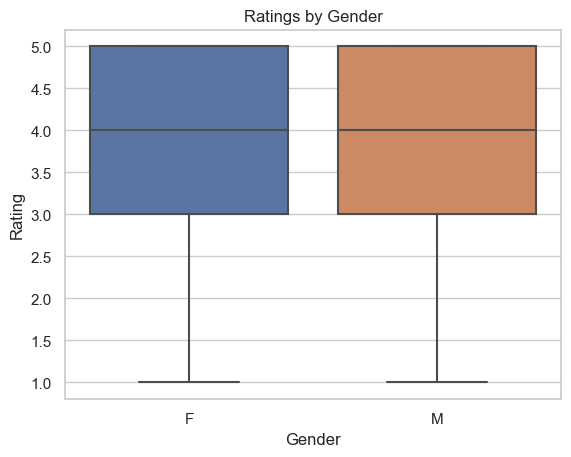

In [21]:
sns.set(style='whitegrid')
g = sns.boxplot(x='gender', y='rating', data=df)
g.set_title('Ratings by Gender')
g.set_xlabel('Gender')
g.set_ylabel('Rating')

#The boxplot shows the distribution of ratings for each gender, 
#including the median, the upper and lower quartiles, and the whiskers. 
#Outliers are plotted as individual points beyond the whiskers.

#The median rating for female users is slightly higher than that for male users.
#The range of ratings for female users is slightly larger than that for male users.
#There are more outliers for female users than for male users

Text(0, 0.5, 'Rating')

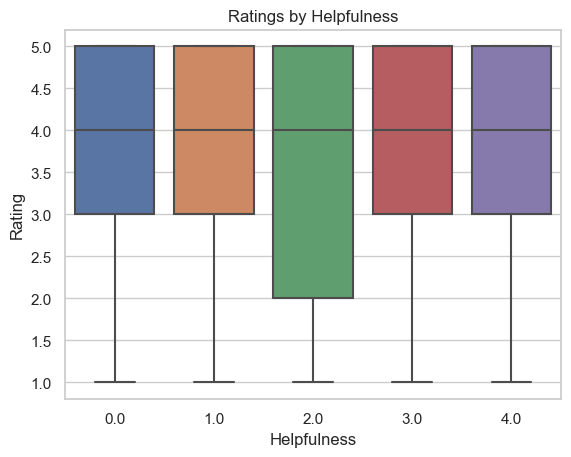

In [23]:
sns.set(style='whitegrid')
g = sns.boxplot(x='helpfulness', y='rating', data=df)
g.set_title('Ratings by Helpfulness')
g.set_xlabel('Helpfulness')
g.set_ylabel('Rating')

#### Q4. Detect and remove outliers

We may define outlier users, reviews and items with three rules (if a record meets one of the rules, it is regarded as an outlier):

1. reviews of which the helpfulness is no more than 2
2. users who rate less than 7 items
3. items that receives less than 11 ratings

Please remove the corresponding records in the csv file that involves outlier users, reviews and items. You need to follow the order of rules to perform data cleaning operations. After that, __print the length of the data__.

In [25]:
print(df.columns)

df = df[df['helpfulness'] > 2]

n_ratings = df.groupby(df.columns[0])['rating'].count()
df = df[df.index.isin(n_ratings[n_ratings >= 7].index)]

n_ratings = df.groupby(df.columns[2])['rating'].count()
df = df[df.index.isin(n_ratings[n_ratings >= 11].index)]

print("Length of the data: ", len(df))

Index(['userId', 'timestamp', 'review', 'item', 'rating', 'helpfulness',
       'gender', 'category', 'item_id', 'item_price', 'user_city'],
      dtype='object')
Length of the data:  0
